## Assignment 4: Obsevational Studies and Applied ML

### Deadline
November 21st,11:59PM

### Important notes

Make sure you push on GitHub your notebook with all the cells already evaluated. Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented. Back up any hypotheses and claims with data, since this is an important aspect of the course. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything.

Use this legendary link to create your repository: [link](https://classroom.github.com/g/YXtsr0QK)

In [9]:
# Put your imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [10]:
data_folder = './data/'
COUNTY_DATA_PATH = "./data/acs2015_county_data.csv"
CENSUS_TRACT_DATA_PATH = "acs2015_census_tract_data.csv"

## Task 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.

Hint: It is useful to add a notion of confidence to your results and explore the data visually. You are allowed to use the SciPy library.

**A) Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?**

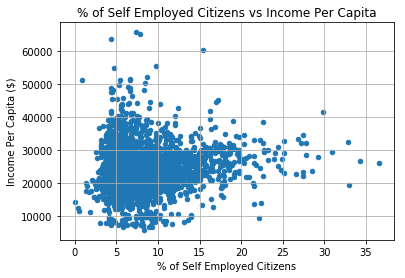

Correlation coefficient between two variables is 0.05614584706029923


In [18]:
# Read file and drop lines containing nan values
county = pd.read_csv(COUNTY_DATA_PATH).dropna()
self_employed = county.SelfEmployed
income_per_cap = county.IncomePerCap

# Scatterplot 
fig, ax = plt.subplots()
county.plot(kind='scatter',x='SelfEmployed', y='IncomePerCap', ax=ax, grid=True)
ax.set_xlabel("% of Self Employed Citizens")
ax.set_ylabel("Income Per Capita ($)")
ax.set_title("% of Self Employed Citizens vs Income Per Capita")
plt.show()

# Spearman rank correlation 
correlation = scipy.stats.spearmanr(self_employed,income_per_cap)

print("Correlation coefficient between two variables is {}".format(correlation[0]))


No obvious dependency can be observed between percentage of self-employment and income per capita across all US counties. Data appears to be clustered based on scatterplot and Spearman correlation between two variables is less then 0.1. 

**B) The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.
**

Correlation coefficient between two variables is -0.2366979000103385


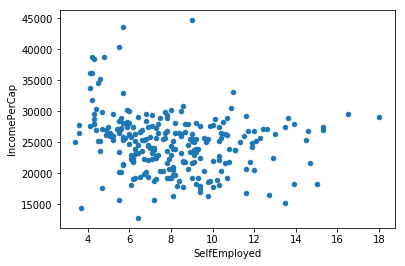

In [56]:
pilot_state_a = ["Wisconsin", "Tennessee", "Minnesota"]

# Select Set A States only 
pilot_county_a = county.loc[county['State'].isin(pilot_state)]

# Scatterplot 
pilot_county_a.plot.scatter(x="SelfEmployed", y="IncomePerCap")

# Spearman rank correlation 
correlation = scipy.stats.spearmanr(pilot_county_a.SelfEmployed,pilot_county_a.IncomePerCap)

print("Correlation coefficient between two variables is {}".format(correlation[0]))


No obvious dependency can be observed from the scatterplot since data points still sppear to be clustered. Negative Spearman correlation can suggest that percentage of self-employment and income per capita is negatively correlated in set A states. 

In [61]:
# find correlation for each state
for state in states_a:
    correlation = scipy.stats.spearmanr(state.SelfEmployed,state.IncomePerCap)
    print("{} : Correlation coefficient between two variables is {}".format(state.State.values[0], correlation[0]))

Wisconsin : Correlation coefficient between two variables is -0.46351291044049403
Tennessee : Correlation coefficient between two variables is -0.316991392780988
Minnesota : Correlation coefficient between two variables is -0.21107460598245847


**C) In which state within set A is the observed effect of self-employment on per-capita income the strongest?**


Wisconsin : Correlation coefficient between two variables is -0.46351291044049403
Tennessee : Correlation coefficient between two variables is -0.316991392780988
Minnesota : Correlation coefficient between two variables is -0.21107460598245847


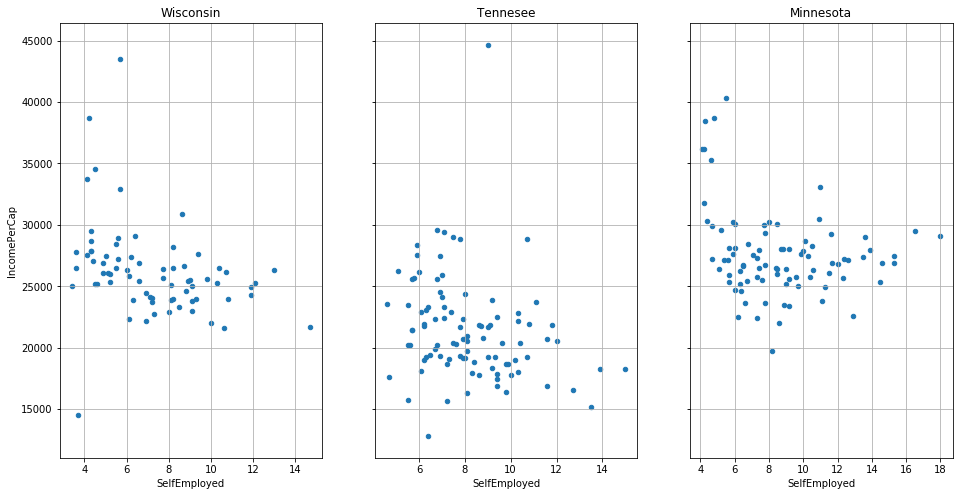

In [64]:
wisconsin = county.loc[county.State == 'Wisconsin']
tennessee = county.loc[county.State == 'Tennessee']
minnesota = county.loc[county.State == 'Minnesota']
states_a = [wisconsin, tennessee, minnesota]
    
# Scatterplot for each state
fig, axs = plt.subplots(1, 3, sharey=True)
wisconsin.plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', title='Wisconsin', ax=axs[0], figsize=(16, 8), grid=True)
tennessee.plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', title='Tennesee', ax=axs[1], grid=True)
minnesota.plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', title='Minnesota', ax=axs[2], grid=True)

# find correlation for each state
for state in states_a:
    correlation = scipy.stats.spearmanr(state.SelfEmployed,state.IncomePerCap)
    print("{} : Correlation coefficient between two variables is {}".format(state.State.values[0], correlation[0]))

Wisconsin appears to have the strongest correlation between percentage of self-employment and income per capita. 

**D) Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.**

Correlation coefficient between two variables is -0.16010624610827853


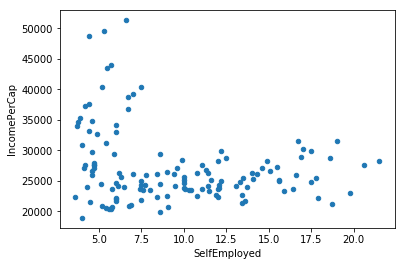

In [62]:
pilot_state_b = ["New Jersey", "Kansas", "Rhode Island"]

# Select Set B State only
pilot_county_b = county.loc[county['State'].isin(pilot_state_b)]

# Draw scatterplot
pilot_county_b.plot.scatter(x="SelfEmployed", y="IncomePerCap")

# Find Spearman rank correlation 
correlation = scipy.stats.spearmanr(pilot_county_b.SelfEmployed,pilot_county_b.IncomePerCap)

print("Correlation coefficient between two variables is {}".format(correlation[0]))

New Jersey : Correlation coefficient between two variables is 0.40403460177366013
Kansas : Correlation coefficient between two variables is 0.28392575483491556
Rhode Island : Correlation coefficient between two variables is 0.9999999999999999


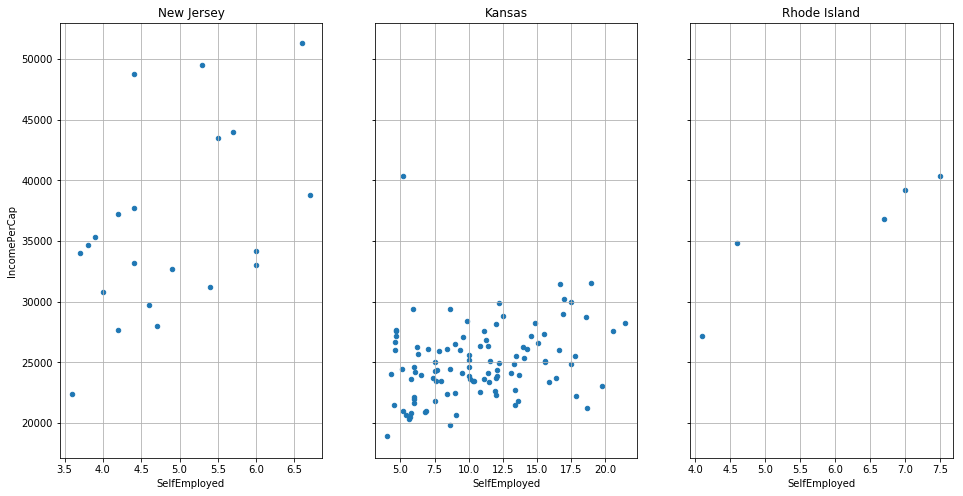

In [68]:
new_jersey = county.loc[county.State == 'New Jersey']
kansas = county.loc[county.State == 'Kansas']
rhode_island = county.loc[county.State == 'Rhode Island']

# Scatterplot for each state in Set B
fig, axs = plt.subplots(1, 3, sharey=True)
new_jersey.plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', title='New Jersey', ax=axs[0], figsize=(16, 8), grid=True)
kansas.plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', title='Kansas', ax=axs[1], grid=True)
rhode_island.plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', title='Rhode Island', ax=axs[2], grid=True)

# Find correlation for each state in Set B
states_b = [new_jersey, kansas, rhode_island]
for state in states_b:
    correlation = scipy.stats.spearmanr(state.SelfEmployed,state.IncomePerCap)
    print("{} : Correlation coefficient between two variables is {}".format(state.State.values[0], correlation[0]))


If the priority of the government is mainly to increase per-capita income, incentivizing self-employment would not give the most ideal results since no obvious correlation can be observed when we look at the data across all states. 

To pick from one of the two sets A and B, I would recommend set B for the following 2 reasons: 

1. In set A, both scatterplots and Spearman correlation suggest that percentage of self-employment and income per capita is negatively correlated. However, since correlation cannot imply causation, we can not say that incentivizing self-employment will decrease income per capita. Yet the negative relationship between two variables may suggest that this is not a good strategy to boost income per capital. 


2. If we observe the state in set B individually, we can detect a potisive linear relationship for all 3 states with Rhode Island having the strongest relationship. However, we do need to keep in mind that set B has relatively less data points that Set A. 

## Task 2: All you need is love… And a dog!

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

**A)** Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. Standardize the values of each feature in the data to have mean 0 and variance 1. The use of external libraries is not permitted in part A, except for numpy and pandas.

**B)** Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold. The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning.

**C)** Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30. Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption.

**D)** Train a random forest. Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". For the chosen parameters, estimate the performance of your classifier on the test set by presenting the confusion matrix, accuracy, precision, recall, and F1-score with respect to both classes and compare the performance with the performance of the logistic regression. Interpret the results.

You are allowed to use the scikit-learn library to implement your classifiers.